# <h1>PREDICTING WINE QUALITY</h1>

# <h5>The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).<br><br> These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant.<br><br>Our goal in the project is to perform a data analysis on the dataset and figure out the features for the model that predicts the wine quality index(score from 0-9)<br><br>You can use either regression or classification for the model prediction.</h5>



# <h2>DATASET DESCRIPTION</h2>

# <h3>The dataset contains 6498 rows and 14 columns</h3>
Input variables (based on physicochemical tests): 
<li>1 - fixed acidity 
<li>2 - volatile acidity 
<li>3 - citric acid 
<li>4 - residual sugar 
<li>5 - chlorides 
<li>6 - free sulfur dioxide 
<li>7 - total sulfur dioxide 
<li>8 - density 
<li>9 - pH 
<li>10 - sulphates 
<li>11 - alcohol 
Output variable (based on sensory data): 
<li>12 - quality (score between 0 and 10)
<li>13- good(1/0)
<li>14-Color(red/white)

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

# <h3> Loading data</h3>

In [43]:
df = pd.read_csv('C:\\Users\computer world\Desktop\ML\project wine quality\winequality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


# <h2>Exploring the Wine Quality dataset </h2>

In [4]:
#no f rows and cols
df.shape


(6497, 14)

In [39]:
#col names
df.columns.values


array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'good', 'color'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
good                    6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [6]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


# <h1> To Check Missing Values</h1>

In [41]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

# <h3> NO missing values in dataset</h3>

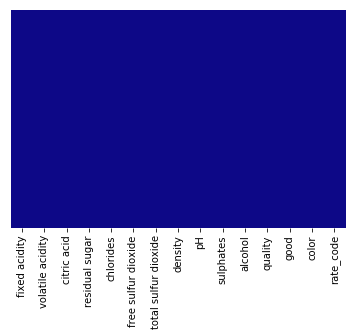

In [80]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'plasma')

# <h3> Correlation between features</h3>

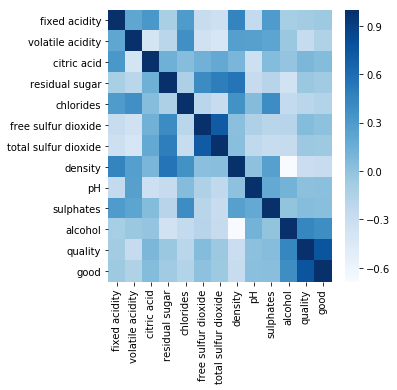

In [44]:
plt.figure(figsize=(5,5))
#print(df.corr())
sns.heatmap(df.corr(),cmap='Blues',annot=False)

# <h5>Dark shades represents positive correlation while lighter shades represents negative correlation<br><br>If you set annot=True, you'll get values by which features are correlated to each other in grid-cells</h5>

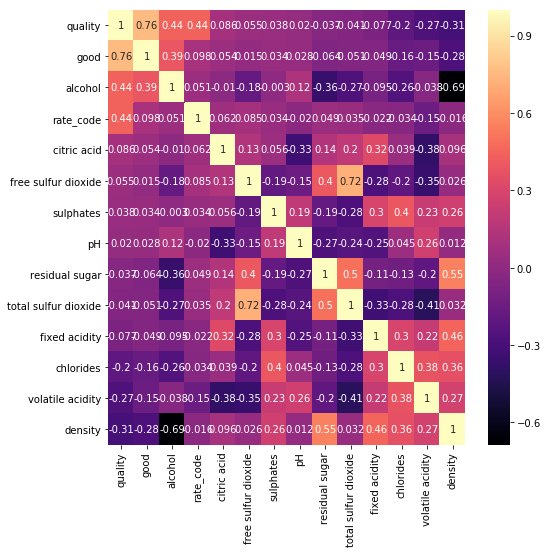

In [81]:
k = 14 
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap = 'magma')

# <h5>Here we can infer that "density" has strong positive correlation with "residual sugar" whereas it has strong negative correlation with "alcohol".<br><br>"free sulphur dioxide" and "citric acid" has almost no correlation with "quality"<br><br>Since correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you're applying Linear Regression model to the dataset.</h5>

# <h3> Rating wine quality</h3>

In [82]:
#The unique values that are present in dataset
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [83]:
#The data is distributed among these values
df.quality.value_counts().sort_index()


3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

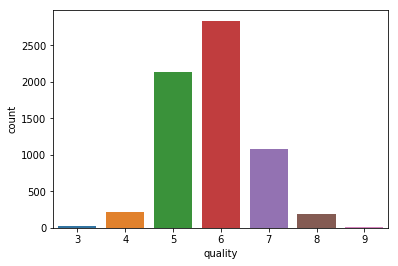

In [84]:
#Show the counts of observations in each categorical bin using bars.
sns.countplot(x='quality', data=df)

# <h5>The above distribution shows the range for response variable (quality) is between 3 to 8.<br><br>Let's create a new discreet, categorical response variable/feature ('rating') from existing 'quality' variable.<br><br>i.e. bad: 1-4<br>average: 5-6<br>good: 7-10

In [85]:
conditions = [
    (df['quality'] >= 7),
    (df['quality'] <= 4)
]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating, default='average')
df.rating.value_counts()

average    4974
good       1277
bad         246
Name: rating, dtype: int64

In [86]:
df.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,rate_code
rating,,,,,,,,,,,,,,
average,7.241536,0.346423,0.316765,5.659087,0.058674,30.766285,117.744069,0.995113,3.215346,0.529908,10.265275,5.570165,0.0,1.0
bad,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350,3.878049,0.0,0.0
good,7.085709,0.289170,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966,1.0,1.0


# <h1>Analysis of alcohol percentage with wine quality:</h1>

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

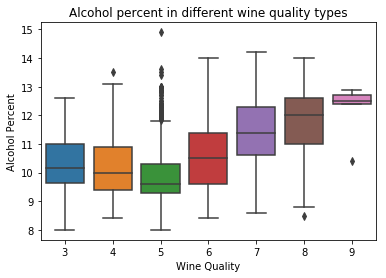

In [87]:
bx = sns.boxplot(x="quality", y='alcohol', data = df)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

#  <h3>Analysis of citric acid &wine ratings</h3>

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'citric acid in different types of Wine ratings')]

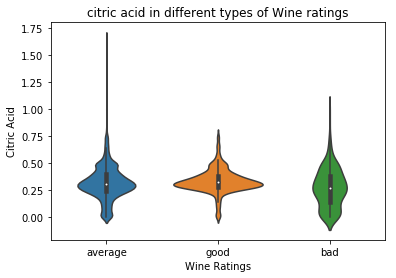

In [88]:
bx = sns.violinplot(x="rating", y='citric acid', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='citric acid in different types of Wine ratings')

# <h3>Analysis of fixed acidity and rating</h3>

[Text(0,0.5,'fixed acidity'),
 Text(0.5,0,'good'),
 Text(0.5,1,'Fixed Acidity in different types of Wine ratings')]

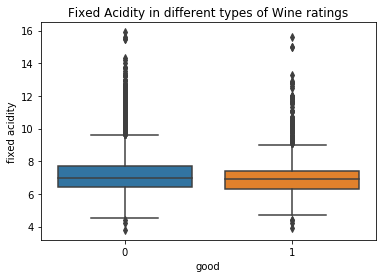

In [89]:
bx = sns.boxplot(x="good", y='fixed acidity', data = df)
bx.set(xlabel='good', ylabel='fixed acidity', title='Fixed Acidity in different types of Wine ratings')

# <h1> LINEAR REGRESSION</h1>

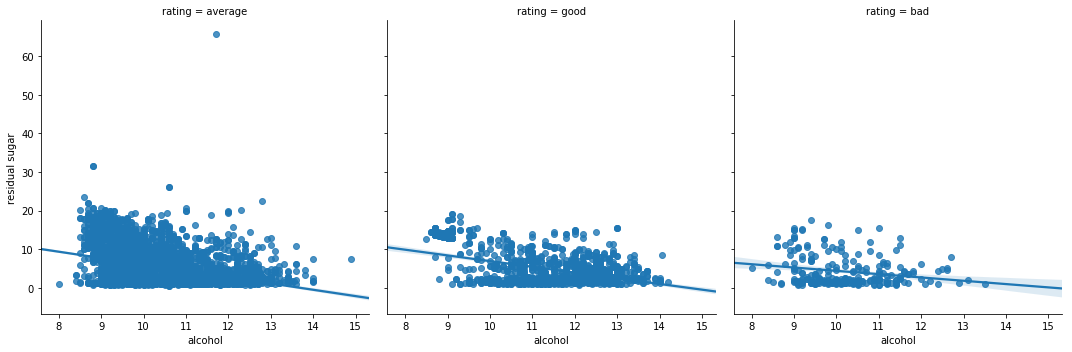

In [90]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "rating", data = df)


<li>The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and residual sugar content of the wine.</li><br>
<li>We can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content.</li><br>
<li>This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the wine.</li>

In [91]:
df2=df[['quality','good','alcohol']]

In [92]:
df2.head()


,quality,good,alcohol
0,5,0,9.4
1,5,0,9.8
2,5,0,9.8
3,6,0,9.8
4,5,0,9.4


In [93]:
X=df2[['good','alcohol']]
y=df2['quality']

In [94]:
from sklearn.feature_selection import VarianceThreshold
z=VarianceThreshold(0.5).fit_transform(X)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, \
                                                    random_state=0)

In [96]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# <h3>Making predictions</h3>

In [97]:
y_pred = regressor.predict(X_test)

In [98]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfp

,Actual,Predicted
5316,6,5.356866
5210,6,5.613196
3518,6,5.331233
1622,5,5.369682
2443,8,7.103040
3521,5,5.382499
5211,6,5.561930
4936,6,5.395315
1161,6,5.485031
5993,6,5.561930


In [99]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.467039922165919
Mean Squared Error:  0.31211026544193665
Root Mean Squared Error:  0.5586682964353147


In [100]:
print(metrics.r2_score(y_test, y_pred))

0.5975217511195623


# <h2> Classification</h2>

In [101]:
X=df2[['good','alcohol']]
y=df2['quality']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, \
                                                   y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

In [103]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
y_pred = classifier.predict(X_test)

In [105]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6627692307692308

In [106]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00        55
          5       0.57      0.56      0.56       532
          6       0.65      0.72      0.68       704
          7       0.85      1.00      0.92       274
          8       0.00      0.00      0.00        47
          9       0.00      0.00      0.00         3

avg / total       0.61      0.66      0.63      1625

